In [1]:
import sys
from importlib import reload
from functools import partial

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from utils_zeropi import DeviceParams, SimulParams
from utils_zeropi import get_phiext_grid
from utils_zeropi_solve import sweep_diagonalize_and_sort_by_overlap, parametric_H

In [3]:
reload(sys.modules['utils_zeropi'])
reload(sys.modules['utils_zeropi_solve'])

<module 'utils_zeropi_solve' from '/Users/shiyesu/Documents/trifluxonium/utils_zeropi_solve.py'>

In [4]:
device = DeviceParams(
    EL=None, 
    EJ=None,
    EC_phi=None,
    EC_theta=None
)

device

DeviceParams(EL=1.3, EJ=7, EC_phi=1.2, EC_theta=0.6)

In [5]:
simul = SimulParams(
    tol=None,
    keig=None,
    N_grid_phi=None,
    N_grid_theta=None,
    D_phi=None,
    N_phiext=None,
)

simul

SimulParams(tol=1e-10, keig=50, N_grid_phi=81, N_grid_theta=100, D_phi=18.84955592153876, N_phiext=21)

In [7]:
evals_phiext, ekets_phiext, ekets_phiext_2D = sweep_diagonalize_and_sort_by_overlap(
    partial(
        parametric_H,
        EC_phi=device.EC_phi,
        EC_theta=device.EC_theta,
        EJ=device.EJ,
        EL=device.EL,
        D_phi=simul.D_phi,
        N_grid_phi=simul.N_grid_phi,
        N_grid_theta=simul.N_grid_theta,
    ), 
    simul.keig, 
    get_phiext_grid(simul.N_phiext), 
    simul.N_grid_phi, 
    simul.N_grid_theta, 
    simul.tol,
)

In [8]:
print(ekets_phiext.shape)
print(ekets_phiext_2D.shape)
# dim1 n_flux, dim2 phi, dim3 theta, dim4 energy level

(21, 8100, 50)
(21, 81, 100, 50)


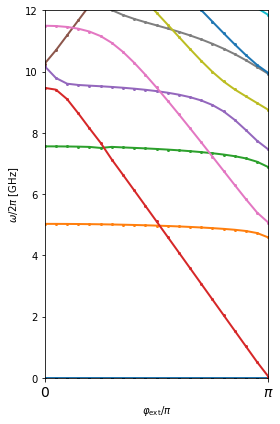

In [9]:
# Plot the energy levels as a function of external flux
fig = plt.figure(figsize=(4,6))
ax  = fig.add_subplot(111)
for i in range(simul.keig):
    ax.plot(get_phiext_grid(simul.N_phiext), evals_phiext[:,i] , linewidth=2.0, linestyle='-', marker='o', markersize=2.0)

ax.set_xlim([0, np.pi])
ax.set_ylim([0, 12])
ax.set_xticks([0, np.pi])
ax.set_xticklabels(["0", r"${\pi}$"] , fontsize=14)
ax.set_xlabel(r'$\varphi_{\mathrm{ext}}/\pi$')
ax.set_ylabel(r'$\omega/2\pi$ [GHz]')
plt.tight_layout()
plt.show()

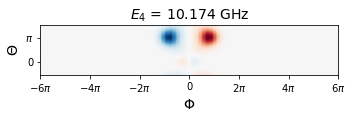

In [10]:
# Plot the wavefunction at a certain flux value
n_level = 4 # energy level
flux = 0.0 * np.pi # flux value

n_flux = int((flux / np.pi) * simul.N_phiext)

fig = plt.figure(2, figsize=(5,3))
ax  = fig.add_subplot(111)
ax.imshow(np.rot90(ekets_phiext_2D[n_flux,:,:,n_level]), 
          cmap='RdBu', 
          extent = [-simul.D_phi, simul.D_phi, -0.5*np.pi, 1.5*np.pi])

ax.set_xticks([-6*np.pi, -4*np.pi, -2*np.pi, 0, 2*np.pi, 4*np.pi, 6*np.pi])
ax.set_xticklabels([r"$-6{\pi}$", r"$-4{\pi}$", r"$-2{\pi}$", 0, r"$2{\pi}$", r"$4{\pi}$", r"$6{\pi}$"])
ax.set_yticks([0, np.pi])
ax.set_yticklabels([0, r"${\pi}$"])
ax.axis('scaled')
ax.set_xlabel('$\Phi$', fontsize=14)
ax.set_ylabel('$\Theta$', fontsize=14)
ax.set_title('$E_%s$ = %s GHz' %(n_level, np.round(evals_phiext[n_flux,n_level],3)), fontsize=14)
plt.tight_layout()

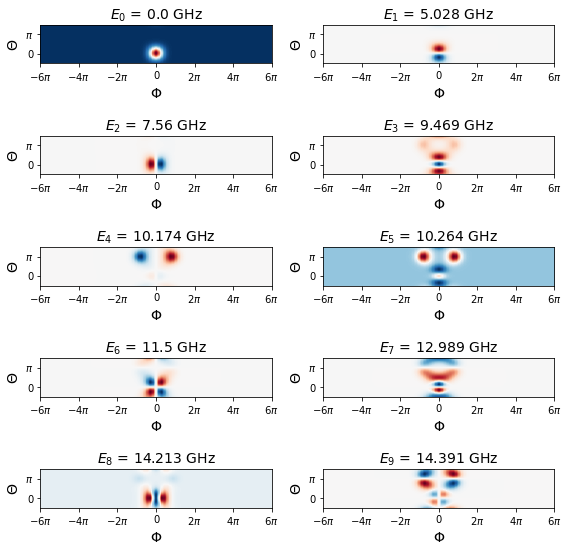

In [11]:
# Plot the wavefunction at a certain flux value

flux = 0.0 * np.pi # flux value
n_flux = int((flux / np.pi) * simul.N_phiext)

fig = plt.figure(3, figsize=(8,8))
for n_level in range(0, 10): # plot first 10
    ax  = fig.add_subplot(5,2,n_level+1)
    ax.imshow(np.rot90(ekets_phiext_2D[n_flux,:,:,n_level]), 
              cmap='RdBu', 
              extent = [-simul.D_phi, simul.D_phi, -0.5*np.pi, 1.5*np.pi])

    ax.set_xticks([-6*np.pi, -4*np.pi, -2*np.pi, 0, 2*np.pi, 4*np.pi, 6*np.pi])
    ax.set_xticklabels([r"$-6{\pi}$", r"$-4{\pi}$", r"$-2{\pi}$", 0, r"$2{\pi}$", r"$4{\pi}$", r"$6{\pi}$"])
    ax.set_yticks([0, np.pi])
    ax.set_yticklabels([0, r"${\pi}$"])
    ax.axis('scaled')
    ax.set_xlabel('$\Phi$', fontsize=14)
    ax.set_ylabel('$\Theta$', fontsize=14)
    ax.set_title('$E_%s$ = %s GHz' %(n_level, np.round(evals_phiext[n_flux,n_level],3)), fontsize=14)
    plt.tight_layout()
    